In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import dataset
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.patches as patches

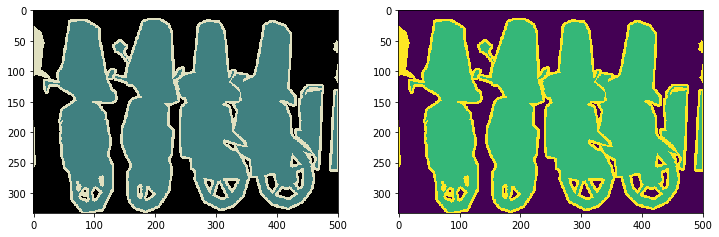

In [2]:
ds = dataset.VOC2012ClassSegmentation('./VOCdevkit/VOC2012')
mask = ds.get_mask('2008_002240')
h, w, _ = mask.shape
classed_mask = np.zeros( (h,w) )
for pos in product(range(h), range(w)):
    classed_mask[pos] = np.argwhere(np.all( ds.color_map == mask[pos], axis=1 ))[0][0]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121, aspect='equal')
ax1.imshow(mask)
ax2 = fig.add_subplot(122, aspect='equal')
ax2.imshow(classed_mask)

In [4]:
image, bboxes, labels, masks = ds.getitem('2008_002240')

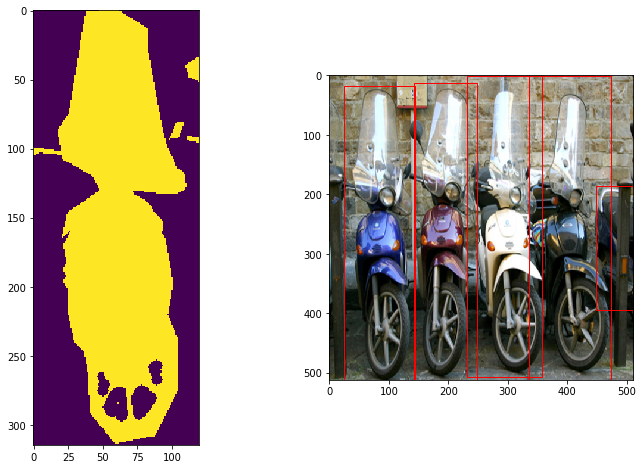

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121, aspect='equal')
ax1.imshow(masks[0])

for bbox in bboxes:
    ax1 = fig.add_subplot(122, aspect='equal')
    ax1.add_patch(patches.Rectangle((bbox[1], bbox[0]), bbox[3]-bbox[1],
        bbox[2]-bbox[0], linewidth=1,edgecolor='r',facecolor='none', fill=False))

ax1.imshow(image)